# Introduction to Digital Forensics - Assignment 3
### 1


### 2

### 3


### Made by group 1:
- Simge Bilen       s2532239
- Mark Boom         s2552469
- Tom Essers        s2484765
- Baran Gülbey      s2616394
- Jelmer Hofman     s2460653
- Stijn Schuurman   s2620162

In [2]:
!pip3 install pandas
!pip3 install matplotlib
!pip3 install openpyxl
!pip3 install tabulate

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import collections
from tabulate import tabulate


In [4]:
#csv file
file =  'jabber_chat_2021_2022_translated.csv'

df = pd.read_csv(file)
test = ""
len(test)

0

# **(1) How many bad words are in the messages?** (Mark)

In [5]:
# code block for "How many bad wordsa re in the messages? (Mark)"

# **(2) In what time zones do the hackers probably live?** (Mark)

In [6]:
# code block for "In what time zones do the hackers probably live? (Mark)"

# **(3) At what time are the hackers the most active?** (Stijn)

(array([ 313.,  408.,  321.,  388.,  249.,  531.,  839., 1977., 2759.,
        3221., 3200., 3582., 4503., 5233., 5257., 4545., 4723., 4946.,
        4393., 3089., 2940., 1952., 1404.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <BarContainer object of 23 artists>)

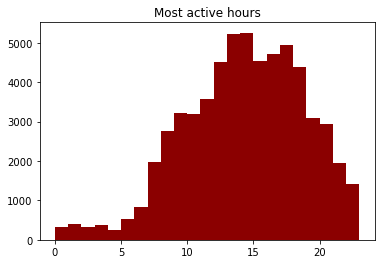

In [7]:
df = pd.read_csv(file, usecols=['ts'])
hours = []
for index, row in df.iterrows():
    hours.append(int(row.ts[11:13]))
plt.title("Most active hours")
plt.hist(hours, color="darkred", bins=range(0, 24))

# **(4) What are the most commonly used words not present in a dictionary?** (Mark)

In [8]:
# code block for "What are the most commonly used words not present in a dictionary? (Mark)"

# **(5) Who sends the most messages?** (Stijn)

<BarContainer object of 10 artists>

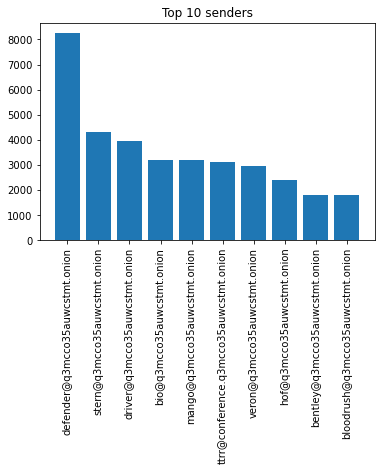

In [9]:
df = pd.read_csv(file, usecols=['sender'])
senders = []
for index, row in df.iterrows():
    senders.append(row.sender)

frequency = collections.Counter(senders)

sendersList = frequency.keys()
frequencyList = frequency.values()

sendersOrdered = [x for _,x in sorted(zip(frequencyList,sendersList), reverse=True)]
frequenciesOrdered = []
# Z is ordered list of most used emails as senders
for x in sendersOrdered:
    frequenciesOrdered.append(frequency.get(x))

plt.title("Top 10 senders")
plt.xticks(rotation=90)
plt.bar(sendersOrdered[:10], frequenciesOrdered[:10])

# **(6) Who receives the most messages?** (Stijn)

<BarContainer object of 10 artists>

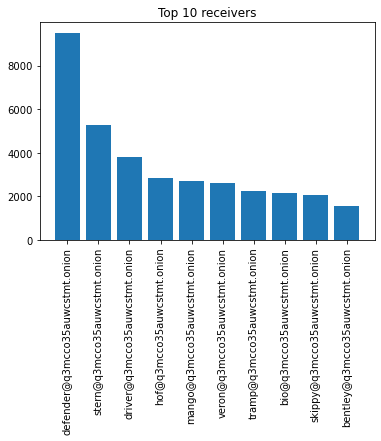

In [10]:
df = pd.read_csv(file, usecols=['to'])
receivers = []
for index, row in df.iterrows():
    receivers.append(row.to)

frequency = collections.Counter(receivers)

receiversList = frequency.keys()
frequencyList = frequency.values()

sendersOrdered = [x for _,x in sorted(zip(frequencyList,receiversList), reverse=True)]
frequenciesOrdered = []
# Z is ordered list of most used emails as senders
for x in sendersOrdered:
    frequenciesOrdered.append(frequency.get(x))

plt.title("Top 10 receivers")
plt.xticks(rotation=90)
plt.bar(sendersOrdered[:10], frequenciesOrdered[:10])

# **(7) What are some movies or songs the hackers reference?** (Mark)

In [11]:
# code block for "What are some movies or songs the hackers reference?"

# **(8) Bitcoin wallets that are mentioned** (Baran)

In [38]:
#receives a string and splits it up at every whitespace. Than iterates over every word so it finds every potential wallet
#finds all word strings that could potentially be a bitcoin wallet, and returns if a match has been made.
def potentialWalletFinder(stringOfCell):
    cryptoBegin = ["1", "3", "b"] #bitcoin wallets normally start with these characters
    splittedCell = stringOfCell.split(' ')
    for word in splittedCell:
        if len(word) > 1: #check if word is actually a word and not a single character
            if word[0] in cryptoBegin: #check if the first character of the word is that of a potential bitcoin wallet
                if len(word) in range(31, 35): # officieel tussen 27 en 34 length bitcoin wallet
                    return word
    return 0                

#there are alot of repeat messages in the cvs file which we definitly know it does not include a bitcoin wallet, so we filter those out initially.
def cleanUp(unCleanedString):
    errorStrings = ["[ERROR: This message is encrypted, and you are unable to decrypt it.]", "[Ошибка: сообщение зашифровано, и невозможно его расшифровать.]","[Error: The message is encrypted and cannot be decrypted.]"] #encrypted messages
    unwantedSubstrings = ["-----BEGIN PGP PUBLIC KEY BLOCK-----", ".onion", "192.168.", "188.130."] #lots of repeated words
    if unCleanedString in errorStrings:
        return 0
    for index in unwantedSubstrings:
        if index in unCleanedString:
            return 0
    return unCleanedString

#turn the list of unique wallets into a list of lists so it can be turned into a table, connect the frequency with every unique wallet address
def setTable(unique, frequency):
    tableFormatted = []
    count = 0
    for index in unique:
        tempList = []
        tempList.append(count + 1)
        tempList.append(index)
        tempList.append(frequency[count])  
        count += 1
        tableFormatted.append(tempList)
    return tableFormatted

#defining a method which gets the wallets from a cvs
def getWallets(dataFile):
    df = pd.read_csv(dataFile, usecols=['body']) #read all rows in the body column
    wallets = []
    for index, row in df.iterrows():
        cleanedUp = cleanUp(row.body)
        if cleanedUp != 0:
            temp = potentialWalletFinder(cleanedUp)
            if temp != 0:
                wallets.append(temp)
    return wallets

#defining a method which gets the unique wallets from a cvs
def getUniqueWallets(dataFile):
    df = pd.read_csv(dataFile, usecols=['body']) #read all rows in the body column
    wallets = []
    for index, row in df.iterrows():
        cleanedUp = cleanUp(row.body)
        if cleanedUp != 0:
            temp = potentialWalletFinder(cleanedUp)
            if temp != 0:
                if temp not in wallets:
                    wallets.append(temp)
    return wallets

#method to find out how many times each wallet address are within the cvs file
def getWalletFrequency(wallets, unique):
    frequency = []
    for i in unique:
        frequency.append(wallets.count(i))
    return frequency

unique = getUniqueWallets(file)
frequency = getWalletFrequency(getWallets(file), unique)
print(tabulate(setTable(unique, frequency), headers=["Nr.", "Bitcoin address", "Frequency"]))

  Nr.  Bitcoin address                       Frequency
-----  ----------------------------------  -----------
    1  3ESoHHu87mTrFNSNUaMVEfT3vYwRYGfSHQ           40
    2  1PemRXvQ5nbDs6q19pCUzfd4kXVGovVoe3            3
    3  14HnaQfsQdtgVSNR91jLcbcKtdyddDfP6D            2
    4  15gjb8F5Zd8XRKBCgVxsr8ZuVzr7yBtnCN            1
    5  1DSp4woswZECAL9zdmmGeu1s7k1sGExFDh            5
    6  1HtyXyCrshiJmLYNru7atpDMJrzG9mzwzf            5
    7  b58c7d4c1824eefc874dd7f07eacec58              1
    8  1KfDPgc6CiWb6Fnin1bLWi2moX1ViXANxW            4
    9  1AXiwETqqQoA52Jk5CmJkbAPuW8nR7VUYz            1
   10  1hLvH27BxAPbqx3R2fMCuuMPfS2gGDBJL             1
   11  3N4oho2uXfkFBfUAPtoPGLUXjHXqXV4vrJ            7
   12  1347fBtFzZCrPq29yjRpct5f6Kq5uHZHHy            1
   13  36UqDj8hGfZTVjpURvSnKtpJnJKjhYcvuY            1
   14  314f41b2d78ec803c74a2c89fa8e8bb4              2
   15  31inPQPChryvSPEnaXrBc6kmYH4NAqYnTR            2
   16  1DS9DVVD4K86ppQhg8ta9XFVEaaW7NXZfA            2
   17  12V

In [42]:
def walletToSenderConnector(dataFile):
    df = pd.read_csv(dataFile, usecols=['sender', 'body'])
    formatted = []
    for index, row in df.iterrows():
        cleanedUp = cleanUp(row.body)
        if cleanedUp != 0:
            temp = potentialWalletFinder(cleanedUp)
            if temp != 0:  
               tempList = []  
               tempList.append(row.sender)  
               tempList.append(temp)     
               formatted.append(tempList)
    return formatted

data = walletToSenderConnector(file)
print(tabulate(data, headers=["Sender", "Bitcoin address"]))

Sender                             Bitcoin address
---------------------------------  ----------------------------------
many@q3mcco35auwcstmt.onion        3ESoHHu87mTrFNSNUaMVEfT3vYwRYGfSHQ
salamandra@q3mcco35auwcstmt.onion  1PemRXvQ5nbDs6q19pCUzfd4kXVGovVoe3
salamandra@q3mcco35auwcstmt.onion  1PemRXvQ5nbDs6q19pCUzfd4kXVGovVoe3
many@q3mcco35auwcstmt.onion        3ESoHHu87mTrFNSNUaMVEfT3vYwRYGfSHQ
many@q3mcco35auwcstmt.onion        3ESoHHu87mTrFNSNUaMVEfT3vYwRYGfSHQ
bentley@q3mcco35auwcstmt.onion     14HnaQfsQdtgVSNR91jLcbcKtdyddDfP6D
bentley@q3mcco35auwcstmt.onion     14HnaQfsQdtgVSNR91jLcbcKtdyddDfP6D
grant@q3mcco35auwcstmt.onion       15gjb8F5Zd8XRKBCgVxsr8ZuVzr7yBtnCN
lemur@q3mcco35auwcstmt.onion       1DSp4woswZECAL9zdmmGeu1s7k1sGExFDh
mavemat@q3mcco35auwcstmt.onion     1HtyXyCrshiJmLYNru7atpDMJrzG9mzwzf
many@q3mcco35auwcstmt.onion        3ESoHHu87mTrFNSNUaMVEfT3vYwRYGfSHQ
stern@q3mcco35auwcstmt.onion       3ESoHHu87mTrFNSNUaMVEfT3vYwRYGfSHQ
many@q3mcco35auwcstmt.onion        3ESo

# **(9) Funny messages** (Baran)

In [30]:
# code block for "Fun conversations"
def funConversations(dataFile):
    df = pd.read_csv(dataFile, usecols=['body_en']) #read all rows in the body column
    cleanMessages = []
    for index, row in df.iterrows():
        cleanedUp = cleanUp(row.body_en)
        if cleanedUp != 0:
            print(row.body_en)

#funConversations(file)
#well, you need an understanding of how you can be useful to us, what experience do you have there in addition to the crypt, etc.
#I have the experience of complete freedom of my time and spending it on programming brings me happiness.
#And even better, delete the chat from the recovery, I did something stupid and created id 0000 ... someone can pick it up
#some dick
#maybe stop drinking now
#maybe quit drinking
#I could hardly resist not to send a dick
#come on pfizer
#pfizer infect me
#I slept for two days
#hello fucking fell asleep yesterday write today we will figure it out
#I will be a housewife soon
#--stopped at 10k--

#"search 'fell asleep'"
            

Hi, bro. Kriptanem dll?
)
Hey
i am from booze
hi
here?
here
[03:17:58]<merch> hello, my admin panel does not open, which your coder configured
hello, I created an acc for mango morisson in 6gr, this is an adver on grids
yo otr ate everything finally that he could) blow please)
hello, vpsk and dediki still relevant? send addresses for payment? 15 minutes
for sn kosh actual https://1ty.me/fVwTjia 0.03361946
hi bro
what can you do to help? agreed last week)
hello you will write
ky
find yourself
hi bro
what can you do to help? agreed last week)
what can you do to help? agreed last week)
Hey
agreed!
zp distributed everything except the green, he is on vacation, I will throw it in as soon as possible
really waiting for you...
hi will you write
hello, send the salary pliz https://1ty.me/fVwTjia 0.03753407
hello, do you have a phone simulation software to download the application and work with it? I can&#39;t find it on the net, it&#39;s some kind of garbage
Found gm, left somewhere. Plans to 

# **(10) What are the topics referred to in the most messages sent to a hacker?** (Stijn)

In [14]:
# code block for "What are the topics referred to in the most messages sent to a person?"

# **(11) Average of messages per person** (Jelmer)

In [15]:
# code block for "Average of messages per person"

# **(12) Who are the hackers?** (Jelmer)

In [16]:
# code block for "Who are the hackers?"

# **(13) Examples of complains that members had** (Simge)

In [17]:
# code block for "Examples of complaints that members had"

# **(14) What percentage of the messages are encrypted?** (Tom)

In [18]:
# code block for "What percentage of the messages are encrypted?"